 # Power Load Prediction for West Zone - Ensemble Model (Monthly)

In [456]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import pandas as pd
%matplotlib inline
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [457]:
power_data_west = pd.read_csv("westdata_augmented.csv")

/var/folders/7y/xgxlym8j2wvcdq_3kmlw40zm0000gn/T/ipykernel_91337/1727164072.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  power_data_west = pd.read_csv("westdata_augmented.csv")


In [458]:
power_data_west['end'] = pd.to_datetime(power_data_west['end'], infer_datetime_format=True)
indexedDataset = power_data_west.set_index(['end'])

In [459]:
power_data_west['end'].min()

Timestamp('2019-01-29 00:15:00')

In [460]:
power_data_west['end'].max()

Timestamp('2022-01-25 16:00:00')

In [461]:
power_data_west.head()

,Unnamed: 0,index_x,service,start,end,usage,cost,temp,event_flag,demand,sfm,index_y,dt,dt_iso,humidity,humidity_temp,pt_date
0,0,0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
1,1,1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
2,2,2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
3,3,3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
4,4,4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8,2019-01-29 01,681,1548752400,2019-01-29 09,21,63.41,2019-01-29 01


In [462]:
power_data_west['month'] = power_data_west['end'].dt.strftime('%b')

In [463]:
from calendar import month_abbr

lower_ma = [m.lower() for m in month_abbr]

# one-liner with Pandas
power_data_west['month_int'] = power_data_west['month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')

In [464]:
power_data_west_mod = power_data_west[['end','demand', 'temp', 'humidity', 'month_int']].copy() 

In [465]:
power_data_west_mod.head()

,end,demand,temp,humidity,month_int
0,2019-01-29 00:15:00,844.8,54.0,21,1
1,2019-01-29 00:30:00,841.6,54.0,21,1
2,2019-01-29 00:45:00,832.0,54.0,21,1
3,2019-01-29 01:00:00,848.0,54.0,21,1
4,2019-01-29 01:15:00,812.8,55.0,21,1


In [466]:
power_data_west_mod.describe()

,demand,temp,humidity,month_int
count,104596.000000,104588.00000,104608.000000,104608.00000
mean,1238.634456,67.39232,52.635401,6.54298
std,302.399419,16.59371,22.815913,3.43464
min,0.000000,29.00000,3.000000,1.00000
25%,1008.000000,54.00000,34.000000,4.00000
50%,1232.000000,66.00000,49.000000,7.00000
75%,1472.000000,79.00000,70.000000,10.00000
max,2124.800000,114.00000,100.000000,12.00000


In [467]:
power_data_west_monthly = power_data_west_mod.resample('M', on='end').agg({'demand':'sum', 'temp':'max', 'humidity':'max', 'month_int':'max'})

In [468]:
power_data_west_monthly.describe()

,demand,temp,humidity,month_int
count,3.700000e+01,37.000000,37.000000,37.000000
mean,3.501519e+06,92.378378,92.675676,6.351351
std,9.434659e+05,14.234839,8.618630,3.568506
min,2.772160e+05,65.000000,66.000000,1.000000
25%,2.839475e+06,81.000000,92.000000,3.000000
50%,3.485974e+06,91.000000,96.000000,6.000000
75%,4.200819e+06,105.000000,98.000000,9.000000
max,4.855107e+06,114.000000,100.000000,12.000000


In [469]:
power_data_west_monthly['end_val'] = power_data_west_monthly.index.values
power_data_west_monthly

,demand,temp,humidity,month_int,end_val
end,,,,,
2019-01-31,277216.00,71.0,92,1,2019-01-31
2019-02-28,2218374.40,73.0,97,2,2019-02-28
2019-03-31,2509120.00,82.0,96,3,2019-03-31
2019-04-30,2498371.21,96.0,95,4,2019-04-30
2019-05-31,3713468.80,91.0,100,5,2019-05-31
2019-06-30,4560950.40,107.0,82,6,2019-06-30
2019-07-31,4615408.00,109.0,72,7,2019-07-31
2019-08-31,4078729.60,107.0,81,8,2019-08-31
2019-09-30,3485974.40,102.0,95,9,2019-09-30


## Ensemble Model - Analysis

In [470]:
linear_model_test_results = pd.read_csv("Monthly_Linear_Model_Test_Results.csv")

In [471]:
linear_model_test_results

,end,Actual,Prediction,residual
0,2021-03-31,3699497.59,2.682333e+06,1.017164e+06
1,2021-04-30,3342217.60,3.603201e+06,-2.609833e+05
2,2021-05-31,4185731.20,3.544508e+06,6.412230e+05
3,2021-06-30,4855107.24,4.475386e+06,3.797215e+05
4,2021-07-31,3984480.00,4.987292e+06,-1.002812e+06
5,2021-08-31,4376488.00,4.206040e+06,1.704478e+05
6,2021-09-30,4704580.80,4.431553e+06,2.730282e+05
7,2021-10-31,4200819.20,4.576732e+06,-3.759126e+05
8,2021-11-30,4068856.00,3.918899e+06,1.499574e+05
9,2021-12-31,3493072.00,3.284198e+06,2.088735e+05


In [472]:
linear_model_test_results['model'] = 'Linear Model'
linear_model_test_results['end'] = linear_model_test_results.index.values
linear_model_test_results

,end,Actual,Prediction,residual,model
0,0,3699497.59,2.682333e+06,1.017164e+06,Linear Model
1,1,3342217.60,3.603201e+06,-2.609833e+05,Linear Model
2,2,4185731.20,3.544508e+06,6.412230e+05,Linear Model
3,3,4855107.24,4.475386e+06,3.797215e+05,Linear Model
4,4,3984480.00,4.987292e+06,-1.002812e+06,Linear Model
5,5,4376488.00,4.206040e+06,1.704478e+05,Linear Model
6,6,4704580.80,4.431553e+06,2.730282e+05,Linear Model
7,7,4200819.20,4.576732e+06,-3.759126e+05,Linear Model
8,8,4068856.00,3.918899e+06,1.499574e+05,Linear Model
9,9,3493072.00,3.284198e+06,2.088735e+05,Linear Model


In [473]:
randomforest_model_test_results = pd.read_csv("Monthly_RandomForest_Model_Test_Results.csv")

In [474]:
randomforest_model_test_results

,end,Actual,Prediction
0,2021-03-31,3699497.59,2.840380e+06
1,2021-04-30,3342217.60,3.504407e+06
2,2021-05-31,4185731.20,3.479179e+06
3,2021-06-30,4855107.24,4.170139e+06
4,2021-07-31,3984480.00,4.287808e+06
5,2021-08-31,4376488.00,4.142254e+06
6,2021-09-30,4704580.80,4.211360e+06
7,2021-10-31,4200819.20,4.335274e+06
8,2021-11-30,4068856.00,3.746216e+06
9,2021-12-31,3493072.00,3.620166e+06


In [475]:
randomforest_model_test_results['residual'] = randomforest_model_test_results['Actual'] - randomforest_model_test_results['Prediction']
randomforest_model_test_results['model'] = 'Random Forest'
randomforest_model_test_results['end'] = randomforest_model_test_results.index.values
randomforest_model_test_results

,end,Actual,Prediction,residual,model
0,0,3699497.59,2.840380e+06,859117.305449,Random Forest
1,1,3342217.60,3.504407e+06,-162189.242080,Random Forest
2,2,4185731.20,3.479179e+06,706552.038343,Random Forest
3,3,4855107.24,4.170139e+06,684968.677111,Random Forest
4,4,3984480.00,4.287808e+06,-303327.802359,Random Forest
5,5,4376488.00,4.142254e+06,234233.762476,Random Forest
6,6,4704580.80,4.211360e+06,493220.544653,Random Forest
7,7,4200819.20,4.335274e+06,-134454.741092,Random Forest
8,8,4068856.00,3.746216e+06,322640.093070,Random Forest
9,9,3493072.00,3.620166e+06,-127094.065547,Random Forest


In [476]:
SARIMA_model_test_results = pd.read_csv("Monthly_SARIMA_Model_Test_Results.csv")

In [477]:
SARIMA_model_test_results

,Actual,Prediction
0,3484392.00,3.319510e+06
1,3039411.20,3.336523e+06
2,3699497.59,4.277424e+06
3,3342217.60,4.995617e+06
4,4185731.20,5.119322e+06
5,4855107.24,4.736312e+06
6,3984480.00,4.309907e+06
7,4376488.00,4.053077e+06
8,4704580.80,3.958555e+06
9,4200819.20,3.724162e+06


In [478]:
SARIMA_model_test_results['residual'] = SARIMA_model_test_results['Actual'] - SARIMA_model_test_results['Prediction']
SARIMA_model_test_results['model'] = 'SARIMA'
SARIMA_model_test_results['end'] = SARIMA_model_test_results.index.values
SARIMA_model_test_results

,Actual,Prediction,residual,model,end
0,3484392.00,3.319510e+06,1.648824e+05,SARIMA,0
1,3039411.20,3.336523e+06,-2.971122e+05,SARIMA,1
2,3699497.59,4.277424e+06,-5.779268e+05,SARIMA,2
3,3342217.60,4.995617e+06,-1.653399e+06,SARIMA,3
4,4185731.20,5.119322e+06,-9.335913e+05,SARIMA,4
5,4855107.24,4.736312e+06,1.187954e+05,SARIMA,5
6,3984480.00,4.309907e+06,-3.254268e+05,SARIMA,6
7,4376488.00,4.053077e+06,3.234105e+05,SARIMA,7
8,4704580.80,3.958555e+06,7.460253e+05,SARIMA,8
9,4200819.20,3.724162e+06,4.766572e+05,SARIMA,9


In [479]:
SVR_model_test_results = pd.read_csv("Monthly_SVR_Model_Test_Results.csv")

In [480]:
SVR_model_test_results

,end,Actual,Prediction
0,0,3342217.60,3.651822e+06
1,1,4185731.20,3.865524e+06
2,2,4855107.24,4.351660e+06
3,3,3984480.00,4.498109e+06
4,4,4376488.00,4.279803e+06
5,5,4704580.80,4.104249e+06
6,6,4200819.20,4.021312e+06
7,7,4068856.00,3.883919e+06
8,8,3493072.00,3.806790e+06
9,9,2618046.38,3.846123e+06


In [481]:
SVR_model_test_results['residual'] = SVR_model_test_results['Actual'] - SVR_model_test_results['Prediction']
SVR_model_test_results['model'] = 'SVR'
SVR_model_test_results

,end,Actual,Prediction,residual,model
0,0,3342217.60,3.651822e+06,-3.096044e+05,SVR
1,1,4185731.20,3.865524e+06,3.202073e+05,SVR
2,2,4855107.24,4.351660e+06,5.034471e+05,SVR
3,3,3984480.00,4.498109e+06,-5.136291e+05,SVR
4,4,4376488.00,4.279803e+06,9.668457e+04,SVR
5,5,4704580.80,4.104249e+06,6.003318e+05,SVR
6,6,4200819.20,4.021312e+06,1.795068e+05,SVR
7,7,4068856.00,3.883919e+06,1.849374e+05,SVR
8,8,3493072.00,3.806790e+06,-3.137182e+05,SVR
9,9,2618046.38,3.846123e+06,-1.228077e+06,SVR


In [482]:
XGBoost_model_test_results = pd.read_csv("Monthly_XGBoost_Model_Test_Results.csv")

In [483]:
XGBoost_model_test_results

,end,Actual,Prediction
0,2021-04-30,3342217.60,4017193.0
1,2021-05-31,4185731.20,3715432.8
2,2021-06-30,4855107.24,4375758.5
3,2021-07-31,3984480.00,4365047.0
4,2021-08-31,4376488.00,3912707.5
5,2021-09-30,4704580.80,4060631.0
6,2021-10-31,4200819.20,4035468.5
7,2021-11-30,4068856.00,3539884.5
8,2021-12-31,3493072.00,3587796.2
9,2022-01-31,2618046.38,3271782.0


In [484]:
XGBoost_model_test_results['residual'] = XGBoost_model_test_results['Actual'] - XGBoost_model_test_results['Prediction']
XGBoost_model_test_results['model'] = 'XG Boost'
XGBoost_model_test_results['end'] = XGBoost_model_test_results.index.values
XGBoost_model_test_results

,end,Actual,Prediction,residual,model
0,0,3342217.60,4017193.0,-674975.40,XG Boost
1,1,4185731.20,3715432.8,470298.40,XG Boost
2,2,4855107.24,4375758.5,479348.74,XG Boost
3,3,3984480.00,4365047.0,-380567.00,XG Boost
4,4,4376488.00,3912707.5,463780.50,XG Boost
5,5,4704580.80,4060631.0,643949.80,XG Boost
6,6,4200819.20,4035468.5,165350.70,XG Boost
7,7,4068856.00,3539884.5,528971.50,XG Boost
8,8,3493072.00,3587796.2,-94724.20,XG Boost
9,9,2618046.38,3271782.0,-653735.62,XG Boost


In [485]:
KNNR_model_test_results = pd.read_csv("Monthly_KNNR_Model_Test_Results.csv")

In [486]:
KNNR_model_test_results

,end,Actual,Prediction
0,2021-04-30,3342217.60,3515408.958
1,2021-05-31,4185731.20,3202954.878
2,2021-06-30,4855107.24,3973454.078
3,2021-07-31,3984480.00,4287180.800
4,2021-08-31,4376488.00,3936434.880
5,2021-09-30,4704580.80,3613799.680
6,2021-10-31,4200819.20,3613483.200
7,2021-11-30,4068856.00,3613483.200
8,2021-12-31,3493072.00,3613483.200
9,2022-01-31,2618046.38,3224611.836


In [487]:
KNNR_model_test_results['residual'] = KNNR_model_test_results['Actual'] - KNNR_model_test_results['Prediction']
KNNR_model_test_results['model'] = 'KNN Regression'
KNNR_model_test_results['end'] = KNNR_model_test_results.index.values
KNNR_model_test_results

,end,Actual,Prediction,residual,model
0,0,3342217.60,3515408.958,-173191.358,KNN Regression
1,1,4185731.20,3202954.878,982776.322,KNN Regression
2,2,4855107.24,3973454.078,881653.162,KNN Regression
3,3,3984480.00,4287180.800,-302700.800,KNN Regression
4,4,4376488.00,3936434.880,440053.120,KNN Regression
5,5,4704580.80,3613799.680,1090781.120,KNN Regression
6,6,4200819.20,3613483.200,587336.000,KNN Regression
7,7,4068856.00,3613483.200,455372.800,KNN Regression
8,8,3493072.00,3613483.200,-120411.200,KNN Regression
9,9,2618046.38,3224611.836,-606565.456,KNN Regression


In [574]:
test_results =pd.concat([linear_model_test_results, randomforest_model_test_results, SVR_model_test_results, XGBoost_model_test_results, SARIMA_model_test_results, KNNR_model_test_results], axis=0)

In [576]:
test_results['MAPE'] = (abs(test_results['Actual'] - test_results['Prediction'])/test_results['Prediction'] ) *100
test_results['MAE'] = abs(test_results['Actual'] - test_results['Prediction'])

In [577]:
test_results

,end,Actual,Prediction,residual,model,MAPE,MAE
0,0,3699497.59,2.682333e+06,1.017164e+06,Linear Model,37.920884,1.017164e+06
1,1,3342217.60,3.603201e+06,-2.609833e+05,Linear Model,7.243097,2.609833e+05
2,2,4185731.20,3.544508e+06,6.412230e+05,Linear Model,18.090605,6.412230e+05
3,3,4855107.24,4.475386e+06,3.797215e+05,Linear Model,8.484665,3.797215e+05
4,4,3984480.00,4.987292e+06,-1.002812e+06,Linear Model,20.107344,1.002812e+06
...,...,...,...,...,...,...,...
5,5,4704580.80,3.613800e+06,1.090781e+06,KNN Regression,30.183774,1.090781e+06
6,6,4200819.20,3.613483e+06,5.873360e+05,KNN Regression,16.254012,5.873360e+05
7,7,4068856.00,3.613483e+06,4.553728e+05,KNN Regression,12.602046,4.553728e+05
8,8,3493072.00,3.613483e+06,-1.204112e+05,KNN Regression,3.332275,1.204112e+05


/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='model', ylabel='MAPE'>

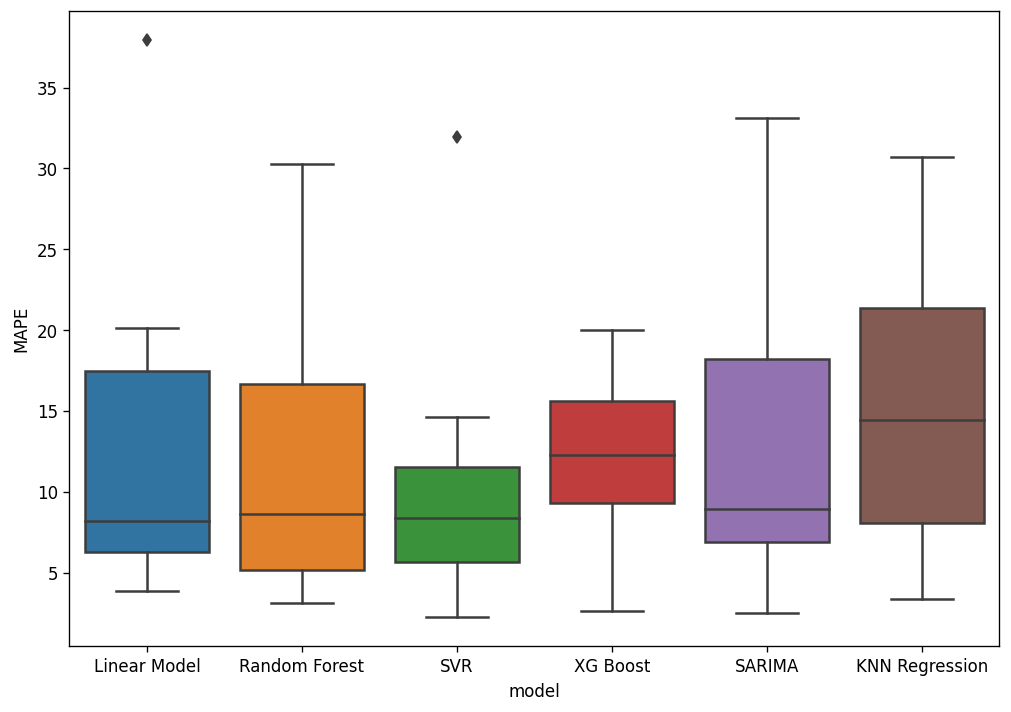

In [578]:
from seaborn import boxplot

boxplot(test_results['model'], test_results['MAPE'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='model', ylabel='residual'>

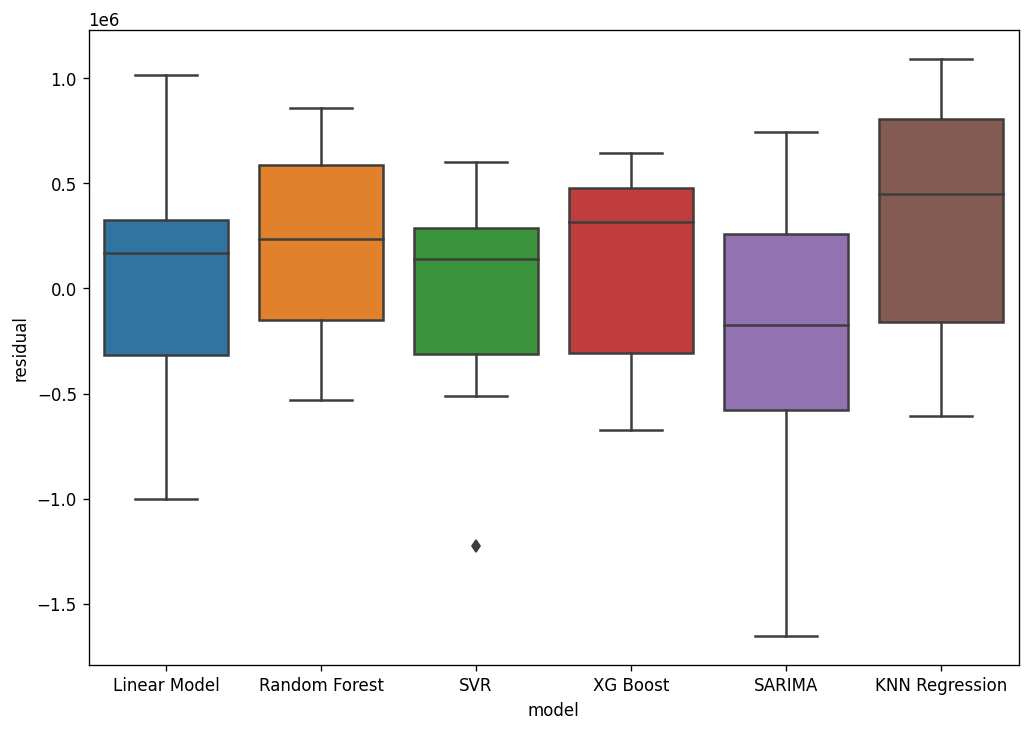

In [579]:
boxplot(test_results['model'], test_results['residual'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='model', ylabel='MAE'>

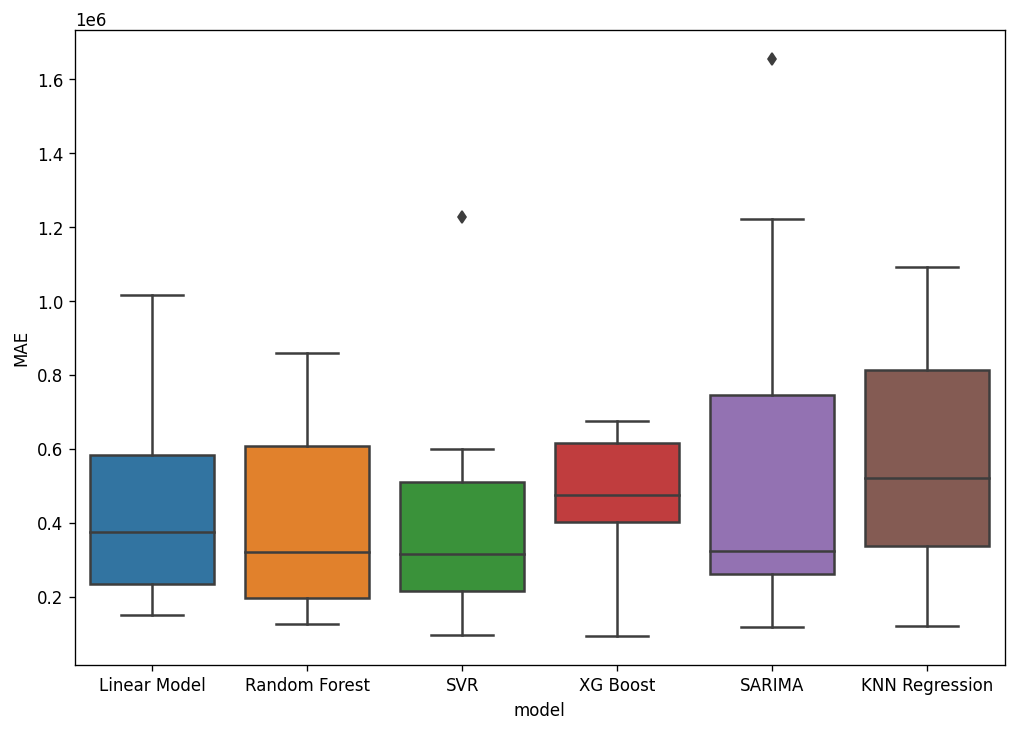

In [580]:
boxplot(test_results['model'], test_results['MAE'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='model', ylabel='Prediction'>

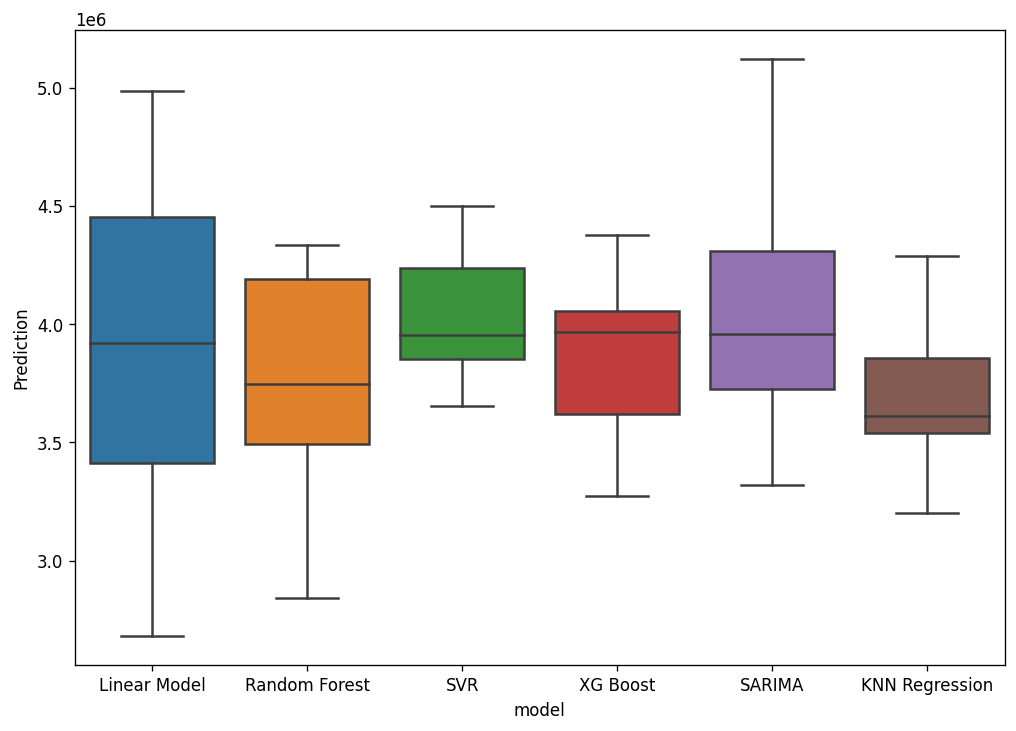

In [494]:
boxplot(results['model'], results['Prediction'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='model', ylabel='Actual'>

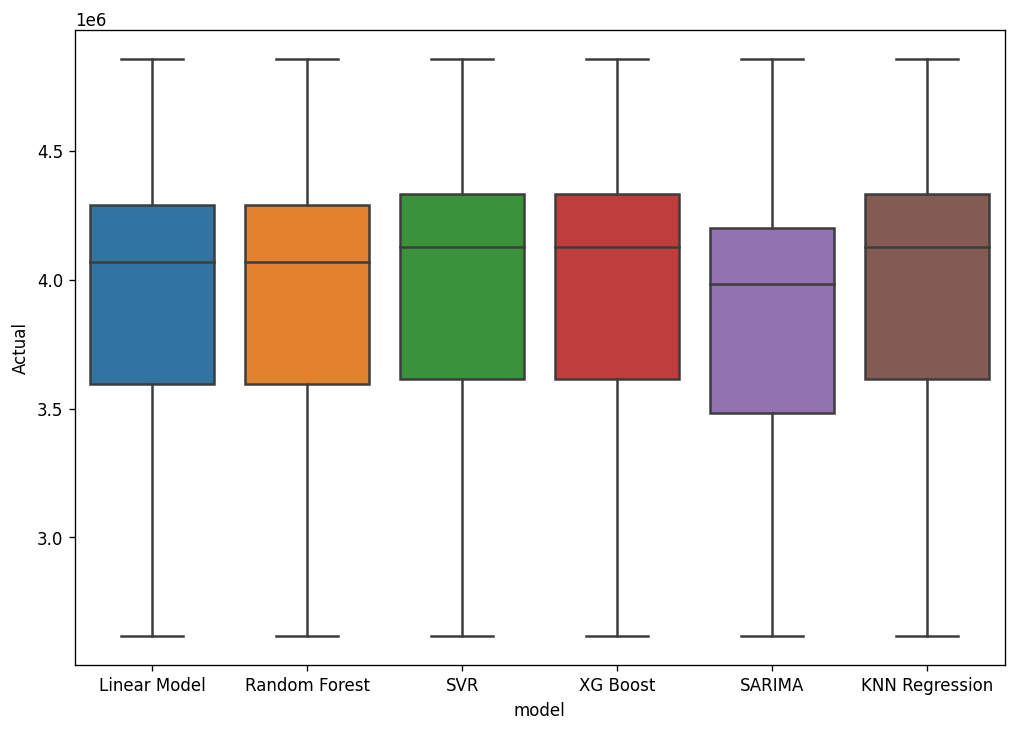

In [581]:
boxplot(test_results['model'], test_results['Actual'])

## Ensemble Model

In [496]:
linear_model_train_results = pd.read_csv("Monthly_Linear_Model_Train_Results.csv")
linear_model_train_results

,end,Actual,Prediction,residual
0,2019-03-31,2509120.00,2.825871e+06,-316750.762443
1,2019-04-30,2498371.21,2.819900e+06,-321528.409586
2,2019-05-31,3713468.80,3.174470e+06,538999.096640
3,2019-06-30,4560950.40,3.955563e+06,605387.205559
4,2019-07-31,4615408.00,4.681019e+06,-65611.422707
5,2019-08-31,4078729.60,4.424563e+06,-345833.438407
6,2019-09-30,3485974.40,3.859935e+06,-373960.653935
7,2019-10-31,3125310.40,3.502852e+06,-377541.101537
8,2019-11-30,3014559.98,3.118832e+06,-104272.298468
9,2019-12-31,2839475.20,2.722317e+06,117158.341065


In [497]:
randomforest_model_train_results = pd.read_csv("Monthly_RandomForest_Model_Train_Results.csv")
randomforest_model_train_results

,end,Actual,Prediction
0,2019-04-30,2498371.21,2.612411e+06
1,2019-05-31,3713468.80,3.437361e+06
2,2019-06-30,4560950.40,4.077175e+06
3,2019-07-31,4615408.00,4.520714e+06
4,2019-08-31,4078729.60,4.180911e+06
5,2019-09-30,3485974.40,3.804326e+06
6,2019-10-31,3125310.40,3.375413e+06
7,2019-11-30,3014559.98,3.217122e+06
8,2019-12-31,2839475.20,2.965095e+06
9,2020-01-31,2657459.20,2.747259e+06


In [498]:
XGBoost_model_train_results = pd.read_csv("Monthly_XGBoost_Model_Train_Results.csv")
XGBoost_model_train_results

,end,Actual,Prediction
0,2019-06-30,4560950.40,4560948.5
1,2019-07-31,4615408.00,4615406.5
2,2019-08-31,4078729.60,4078731.5
3,2019-09-30,3485974.40,3485976.5
4,2019-10-31,3125310.40,3125312.0
5,2019-11-30,3014559.98,3014560.8
6,2019-12-31,2839475.20,2839476.0
7,2020-01-31,2657459.20,2657460.0
8,2020-02-29,2448260.80,2448260.0
9,2020-03-31,2675177.60,2675177.5


In [499]:
KNNR_model_train_results = pd.read_csv("Monthly_KNNR_Model_Train_Results.csv")
KNNR_model_train_results

,end,Actual,Prediction
0,2019-06-30,4560950.40,4113371.518
1,2019-07-31,4615408.00,4440890.240
2,2019-08-31,4078729.60,4290595.520
3,2019-09-30,3485974.40,4060303.680
4,2019-10-31,3125310.40,3296728.316
5,2019-11-30,3014559.98,3100629.756
6,2019-12-31,2839475.20,3050080.634
7,2020-01-31,2657459.20,2863974.078
8,2020-02-29,2448260.80,2731452.798
9,2020-03-31,2675177.60,2988213.118


In [500]:
SVR_model_train_results = pd.read_csv("Monthly_SVR_Model_Train_Results.csv")
SVR_model_train_results

,Unnamed: 0,Actual,Prediction
0,0,4.855792e+06,4.474797e+06
1,1,4.903694e+06,4.840008e+06
2,2,4.431619e+06,4.495396e+06
3,3,3.910218e+06,4.045298e+06
4,4,3.592970e+06,3.656373e+06
5,5,3.495551e+06,3.559117e+06
6,6,3.341542e+06,3.405371e+06
7,7,3.181437e+06,3.245129e+06
8,8,2.997421e+06,3.151565e+06
9,9,3.197022e+06,3.260452e+06


In [501]:
results_train = linear_model_train_results.merge(randomforest_model_train_results, left_on='end', right_on='end', suffixes=('_linear', '_randomforest')) 

In [502]:
results_train

,end,Actual_linear,Prediction_linear,residual,Actual_randomforest,Prediction_randomforest
0,2019-04-30,2498371.21,2.819900e+06,-321528.409586,2498371.21,2.612411e+06
1,2019-05-31,3713468.80,3.174470e+06,538999.096640,3713468.80,3.437361e+06
2,2019-06-30,4560950.40,3.955563e+06,605387.205559,4560950.40,4.077175e+06
3,2019-07-31,4615408.00,4.681019e+06,-65611.422707,4615408.00,4.520714e+06
4,2019-08-31,4078729.60,4.424563e+06,-345833.438407,4078729.60,4.180911e+06
5,2019-09-30,3485974.40,3.859935e+06,-373960.653935,3485974.40,3.804326e+06
6,2019-10-31,3125310.40,3.502852e+06,-377541.101537,3125310.40,3.375413e+06
7,2019-11-30,3014559.98,3.118832e+06,-104272.298468,3014559.98,3.217122e+06
8,2019-12-31,2839475.20,2.722317e+06,117158.341065,2839475.20,2.965095e+06
9,2020-01-31,2657459.20,2.694286e+06,-36826.735063,2657459.20,2.747259e+06


In [503]:
results_train_1 = results_train.merge(XGBoost_model_train_results, left_on='end', right_on='end', suffixes=('', '_xgboost')) 

In [504]:
results_train_1['Actual_xgboost']= results_train_1['Actual']
results_train_1['Prediction_xgboost']= results_train_1['Prediction']
results_train_1 = results_train_1.drop(['residual', 'Actual', 'Prediction'], axis=1)
results_train_1

,end,Actual_linear,Prediction_linear,Actual_randomforest,Prediction_randomforest,Actual_xgboost,Prediction_xgboost
0,2019-06-30,4560950.40,3.955563e+06,4560950.40,4.077175e+06,4560950.40,4560948.5
1,2019-07-31,4615408.00,4.681019e+06,4615408.00,4.520714e+06,4615408.00,4615406.5
2,2019-08-31,4078729.60,4.424563e+06,4078729.60,4.180911e+06,4078729.60,4078731.5
3,2019-09-30,3485974.40,3.859935e+06,3485974.40,3.804326e+06,3485974.40,3485976.5
4,2019-10-31,3125310.40,3.502852e+06,3125310.40,3.375413e+06,3125310.40,3125312.0
5,2019-11-30,3014559.98,3.118832e+06,3014559.98,3.217122e+06,3014559.98,3014560.8
6,2019-12-31,2839475.20,2.722317e+06,2839475.20,2.965095e+06,2839475.20,2839476.0
7,2020-01-31,2657459.20,2.694286e+06,2657459.20,2.747259e+06,2657459.20,2657460.0
8,2020-02-29,2448260.80,2.328334e+06,2448260.80,2.562021e+06,2448260.80,2448260.0
9,2020-03-31,2675177.60,2.646184e+06,2675177.60,2.701656e+06,2675177.60,2675177.5


In [505]:
results_train_2 = results_train_1.merge(KNNR_model_train_results, left_on='end', right_on='end', suffixes=('', '_KNNR')) 

In [506]:
results_train_2['Actual_KNNR'] = results_train_2['Actual']
results_train_2['Prediction_KNNR'] = results_train_2['Prediction']
results_train_2 = results_train_2.drop(['Actual', 'Prediction'], axis=1)
results_train_2

,end,Actual_linear,Prediction_linear,Actual_randomforest,Prediction_randomforest,Actual_xgboost,Prediction_xgboost,Actual_KNNR,Prediction_KNNR
0,2019-06-30,4560950.40,3.955563e+06,4560950.40,4.077175e+06,4560950.40,4560948.5,4560950.40,4113371.518
1,2019-07-31,4615408.00,4.681019e+06,4615408.00,4.520714e+06,4615408.00,4615406.5,4615408.00,4440890.240
2,2019-08-31,4078729.60,4.424563e+06,4078729.60,4.180911e+06,4078729.60,4078731.5,4078729.60,4290595.520
3,2019-09-30,3485974.40,3.859935e+06,3485974.40,3.804326e+06,3485974.40,3485976.5,3485974.40,4060303.680
4,2019-10-31,3125310.40,3.502852e+06,3125310.40,3.375413e+06,3125310.40,3125312.0,3125310.40,3296728.316
5,2019-11-30,3014559.98,3.118832e+06,3014559.98,3.217122e+06,3014559.98,3014560.8,3014559.98,3100629.756
6,2019-12-31,2839475.20,2.722317e+06,2839475.20,2.965095e+06,2839475.20,2839476.0,2839475.20,3050080.634
7,2020-01-31,2657459.20,2.694286e+06,2657459.20,2.747259e+06,2657459.20,2657460.0,2657459.20,2863974.078
8,2020-02-29,2448260.80,2.328334e+06,2448260.80,2.562021e+06,2448260.80,2448260.0,2448260.80,2731452.798
9,2020-03-31,2675177.60,2.646184e+06,2675177.60,2.701656e+06,2675177.60,2675177.5,2675177.60,2988213.118


In [507]:
#results_train_2['Prediction_SVR'] = SVR_model_train_results.head(21)['Prediction']
#results_train_2

In [508]:
results_train_2.shape

(21, 9)

In [509]:
power_data_west_monthly_mod = power_data_west_monthly[(power_data_west_monthly['end_val'] > '2019-06-01') & (power_data_west_monthly['end_val'] < '2021-03-30')]

In [510]:
power_data_west_monthly_mod

,demand,temp,humidity,month_int,end_val
end,,,,,
2019-06-30,4560950.40,107.0,82,6,2019-06-30
2019-07-31,4615408.00,109.0,72,7,2019-07-31
2019-08-31,4078729.60,107.0,81,8,2019-08-31
2019-09-30,3485974.40,102.0,95,9,2019-09-30
2019-10-31,3125310.40,90.0,91,10,2019-10-31
2019-11-30,3014559.98,81.0,95,11,2019-11-30
2019-12-31,2839475.20,73.0,99,12,2019-12-31
2020-01-31,2657459.20,65.0,98,1,2020-01-31
2020-02-29,2448260.80,82.0,96,2,2020-02-29


In [511]:
power_data_west_monthly_mod.shape

(21, 5)

In [512]:
power_data_west_monthly_mod.dtypes

demand              float64
temp                float64
humidity              int64
month_int              Int8
end_val      datetime64[ns]
dtype: object

In [513]:
results_train_2.dtypes

end                         object
Actual_linear              float64
Prediction_linear          float64
Actual_randomforest        float64
Prediction_randomforest    float64
Actual_xgboost             float64
Prediction_xgboost         float64
Actual_KNNR                float64
Prediction_KNNR            float64
dtype: object

In [514]:
results_train_2

,end,Actual_linear,Prediction_linear,Actual_randomforest,Prediction_randomforest,Actual_xgboost,Prediction_xgboost,Actual_KNNR,Prediction_KNNR
0,2019-06-30,4560950.40,3.955563e+06,4560950.40,4.077175e+06,4560950.40,4560948.5,4560950.40,4113371.518
1,2019-07-31,4615408.00,4.681019e+06,4615408.00,4.520714e+06,4615408.00,4615406.5,4615408.00,4440890.240
2,2019-08-31,4078729.60,4.424563e+06,4078729.60,4.180911e+06,4078729.60,4078731.5,4078729.60,4290595.520
3,2019-09-30,3485974.40,3.859935e+06,3485974.40,3.804326e+06,3485974.40,3485976.5,3485974.40,4060303.680
4,2019-10-31,3125310.40,3.502852e+06,3125310.40,3.375413e+06,3125310.40,3125312.0,3125310.40,3296728.316
5,2019-11-30,3014559.98,3.118832e+06,3014559.98,3.217122e+06,3014559.98,3014560.8,3014559.98,3100629.756
6,2019-12-31,2839475.20,2.722317e+06,2839475.20,2.965095e+06,2839475.20,2839476.0,2839475.20,3050080.634
7,2020-01-31,2657459.20,2.694286e+06,2657459.20,2.747259e+06,2657459.20,2657460.0,2657459.20,2863974.078
8,2020-02-29,2448260.80,2.328334e+06,2448260.80,2.562021e+06,2448260.80,2448260.0,2448260.80,2731452.798
9,2020-03-31,2675177.60,2.646184e+06,2675177.60,2.701656e+06,2675177.60,2675177.5,2675177.60,2988213.118


In [515]:
results_train_3 = results_train_2.drop(['Actual_linear', 'Actual_randomforest', 'Actual_xgboost', 'Actual_KNNR'], axis=1)

In [516]:
results_train_2

,end,Actual_linear,Prediction_linear,Actual_randomforest,Prediction_randomforest,Actual_xgboost,Prediction_xgboost,Actual_KNNR,Prediction_KNNR
0,2019-06-30,4560950.40,3.955563e+06,4560950.40,4.077175e+06,4560950.40,4560948.5,4560950.40,4113371.518
1,2019-07-31,4615408.00,4.681019e+06,4615408.00,4.520714e+06,4615408.00,4615406.5,4615408.00,4440890.240
2,2019-08-31,4078729.60,4.424563e+06,4078729.60,4.180911e+06,4078729.60,4078731.5,4078729.60,4290595.520
3,2019-09-30,3485974.40,3.859935e+06,3485974.40,3.804326e+06,3485974.40,3485976.5,3485974.40,4060303.680
4,2019-10-31,3125310.40,3.502852e+06,3125310.40,3.375413e+06,3125310.40,3125312.0,3125310.40,3296728.316
5,2019-11-30,3014559.98,3.118832e+06,3014559.98,3.217122e+06,3014559.98,3014560.8,3014559.98,3100629.756
6,2019-12-31,2839475.20,2.722317e+06,2839475.20,2.965095e+06,2839475.20,2839476.0,2839475.20,3050080.634
7,2020-01-31,2657459.20,2.694286e+06,2657459.20,2.747259e+06,2657459.20,2657460.0,2657459.20,2863974.078
8,2020-02-29,2448260.80,2.328334e+06,2448260.80,2.562021e+06,2448260.80,2448260.0,2448260.80,2731452.798
9,2020-03-31,2675177.60,2.646184e+06,2675177.60,2.701656e+06,2675177.60,2675177.5,2675177.60,2988213.118


In [517]:
results_train_3['end'] = pd.to_datetime(results_train_3['end'], infer_datetime_format=True)
results_train_3['month'] = results_train_3['end'].dt.strftime('%b')
results_train_3['month_int'] = results_train_3['month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')

results_train_3 = results_train_3.drop(['month', 'end'], axis=1)
results_train_3

,Prediction_linear,Prediction_randomforest,Prediction_xgboost,Prediction_KNNR,month_int
0,3.955563e+06,4.077175e+06,4560948.5,4113371.518,6
1,4.681019e+06,4.520714e+06,4615406.5,4440890.240,7
2,4.424563e+06,4.180911e+06,4078731.5,4290595.520,8
3,3.859935e+06,3.804326e+06,3485976.5,4060303.680,9
4,3.502852e+06,3.375413e+06,3125312.0,3296728.316,10
5,3.118832e+06,3.217122e+06,3014560.8,3100629.756,11
6,2.722317e+06,2.965095e+06,2839476.0,3050080.634,12
7,2.694286e+06,2.747259e+06,2657460.0,2863974.078,1
8,2.328334e+06,2.562021e+06,2448260.0,2731452.798,2
9,2.646184e+06,2.701656e+06,2675177.5,2988213.118,3


In [518]:
X_train = results_train_3
y_train = results_train_2['Actual_linear']

In [519]:
X_train.shape

(21, 5)

In [520]:
y_train.shape

(21,)

In [521]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#ensemble_lr = LinearRegression(fit_intercept=True)
ensemble_model = RandomForestRegressor(n_estimators=10000)
ensemble_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10000)

In [522]:
ensemble_model

RandomForestRegressor(n_estimators=10000)

In [554]:
results_test_0 = linear_model_test_results.tail(10).merge(randomforest_model_test_results.tail(10), left_on='end', right_on='end', suffixes=('_linear', '_randomforest'))
results_test_0 = results_test_0.drop(['end', 'residual_linear', 'model_linear', 'residual_randomforest', 'model_randomforest'], axis=1)
results_test_0

,Actual_linear,Prediction_linear,Actual_randomforest,Prediction_randomforest
0,3342217.60,3.603201e+06,3342217.60,3.504407e+06
1,4185731.20,3.544508e+06,4185731.20,3.479179e+06
2,4855107.24,4.475386e+06,4855107.24,4.170139e+06
3,3984480.00,4.987292e+06,3984480.00,4.287808e+06
4,4376488.00,4.206040e+06,4376488.00,4.142254e+06
5,4704580.80,4.431553e+06,4704580.80,4.211360e+06
6,4200819.20,4.576732e+06,4200819.20,4.335274e+06
7,4068856.00,3.918899e+06,4068856.00,3.746216e+06
8,3493072.00,3.284198e+06,3493072.00,3.620166e+06
9,2618046.38,3.145873e+06,2618046.38,3.151299e+06


In [548]:
results_test_1 = pd.concat([results_test_0, XGBoost_model_test_results], axis=1)
results_test_1['Actual_xgboost'] = results_test_1['Actual']
results_test_1['Prediction_xgboost'] = results_test_1['Prediction']
results_test_1 = results_test_1.drop(['Actual', 'Prediction','residual', 'model','end'], axis=1)
results_test_1

,Actual_linear,Prediction_linear,Actual_randomforest,Prediction_randomforest,Actual_xgboost,Prediction_xgboost
0,3342217.60,3.603201e+06,3342217.60,3.504407e+06,3342217.60,4017193.0
1,4185731.20,3.544508e+06,4185731.20,3.479179e+06,4185731.20,3715432.8
2,4855107.24,4.475386e+06,4855107.24,4.170139e+06,4855107.24,4375758.5
3,3984480.00,4.987292e+06,3984480.00,4.287808e+06,3984480.00,4365047.0
4,4376488.00,4.206040e+06,4376488.00,4.142254e+06,4376488.00,3912707.5
5,4704580.80,4.431553e+06,4704580.80,4.211360e+06,4704580.80,4060631.0
6,4200819.20,4.576732e+06,4200819.20,4.335274e+06,4200819.20,4035468.5
7,4068856.00,3.918899e+06,4068856.00,3.746216e+06,4068856.00,3539884.5
8,3493072.00,3.284198e+06,3493072.00,3.620166e+06,3493072.00,3587796.2
9,2618046.38,3.145873e+06,2618046.38,3.151299e+06,2618046.38,3271782.0


In [551]:
KNNR_model_test_results_mod = KNNR_model_test_results.drop(['end'], axis=1)
results_test_2 = pd.concat([results_test_1, KNNR_model_test_results_mod], axis=1)
results_test_2['Actual_KNNR'] = results_test_2['Actual']
results_test_2['Prediction_KNNR'] = results_test_2['Prediction']
results_test_2 = results_test_2.drop(['Actual', 'Prediction', 'residual', 'model'], axis=1)
results_test_2

,Actual_linear,Prediction_linear,Actual_randomforest,Prediction_randomforest,Actual_xgboost,Prediction_xgboost,Actual_KNNR,Prediction_KNNR
0,3342217.60,3.603201e+06,3342217.60,3.504407e+06,3342217.60,4017193.0,3342217.60,3515408.958
1,4185731.20,3.544508e+06,4185731.20,3.479179e+06,4185731.20,3715432.8,4185731.20,3202954.878
2,4855107.24,4.475386e+06,4855107.24,4.170139e+06,4855107.24,4375758.5,4855107.24,3973454.078
3,3984480.00,4.987292e+06,3984480.00,4.287808e+06,3984480.00,4365047.0,3984480.00,4287180.800
4,4376488.00,4.206040e+06,4376488.00,4.142254e+06,4376488.00,3912707.5,4376488.00,3936434.880
5,4704580.80,4.431553e+06,4704580.80,4.211360e+06,4704580.80,4060631.0,4704580.80,3613799.680
6,4200819.20,4.576732e+06,4200819.20,4.335274e+06,4200819.20,4035468.5,4200819.20,3613483.200
7,4068856.00,3.918899e+06,4068856.00,3.746216e+06,4068856.00,3539884.5,4068856.00,3613483.200
8,3493072.00,3.284198e+06,3493072.00,3.620166e+06,3493072.00,3587796.2,3493072.00,3613483.200
9,2618046.38,3.145873e+06,2618046.38,3.151299e+06,2618046.38,3271782.0,2618046.38,3224611.836


In [526]:
#results_test_2['Prediction_SVR'] = SVR_model_test_results['Prediction']

In [563]:
results_test_3 = results_test_2.copy()
#results_test_3['end'] = pd.to_datetime(results_test_3['end'], infer_datetime_format=True)
#results_test_3['month'] = results_test_3['end'].dt.strftime('%b')
#results_test_3['month_int'] = results_test_3['month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')

results_test_3 = results_test_3.drop(['Actual_linear', 'Actual_randomforest', 'Actual_xgboost', 'Actual_KNNR'], axis=1)
#results_test_3 = results_test_3.drop(['residual', 'model', 'Actual_linear', 'Actual_randomforest', 'Actual_xgboost', 'Actual_KNNR'], axis=1)
results_test_3['month_int'] = results_test_3.index.values + 4
results_test_3.at[9,'month_int']=1
results_test_3

,Prediction_linear,Prediction_randomforest,Prediction_xgboost,Prediction_KNNR,month_int
0,3.603201e+06,3.504407e+06,4017193.0,3515408.958,4
1,3.544508e+06,3.479179e+06,3715432.8,3202954.878,5
2,4.475386e+06,4.170139e+06,4375758.5,3973454.078,6
3,4.987292e+06,4.287808e+06,4365047.0,4287180.800,7
4,4.206040e+06,4.142254e+06,3912707.5,3936434.880,8
5,4.431553e+06,4.211360e+06,4060631.0,3613799.680,9
6,4.576732e+06,4.335274e+06,4035468.5,3613483.200,10
7,3.918899e+06,3.746216e+06,3539884.5,3613483.200,11
8,3.284198e+06,3.620166e+06,3587796.2,3613483.200,12
9,3.145873e+06,3.151299e+06,3271782.0,3224611.836,1


In [564]:
X_test = results_test_3
y_test = results_test_2['Actual_linear']

In [565]:
X_test.shape

(10, 5)

In [566]:
y_test.shape

(10,)

In [567]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))

def mse_error(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=True)

def rmse_error(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=False)

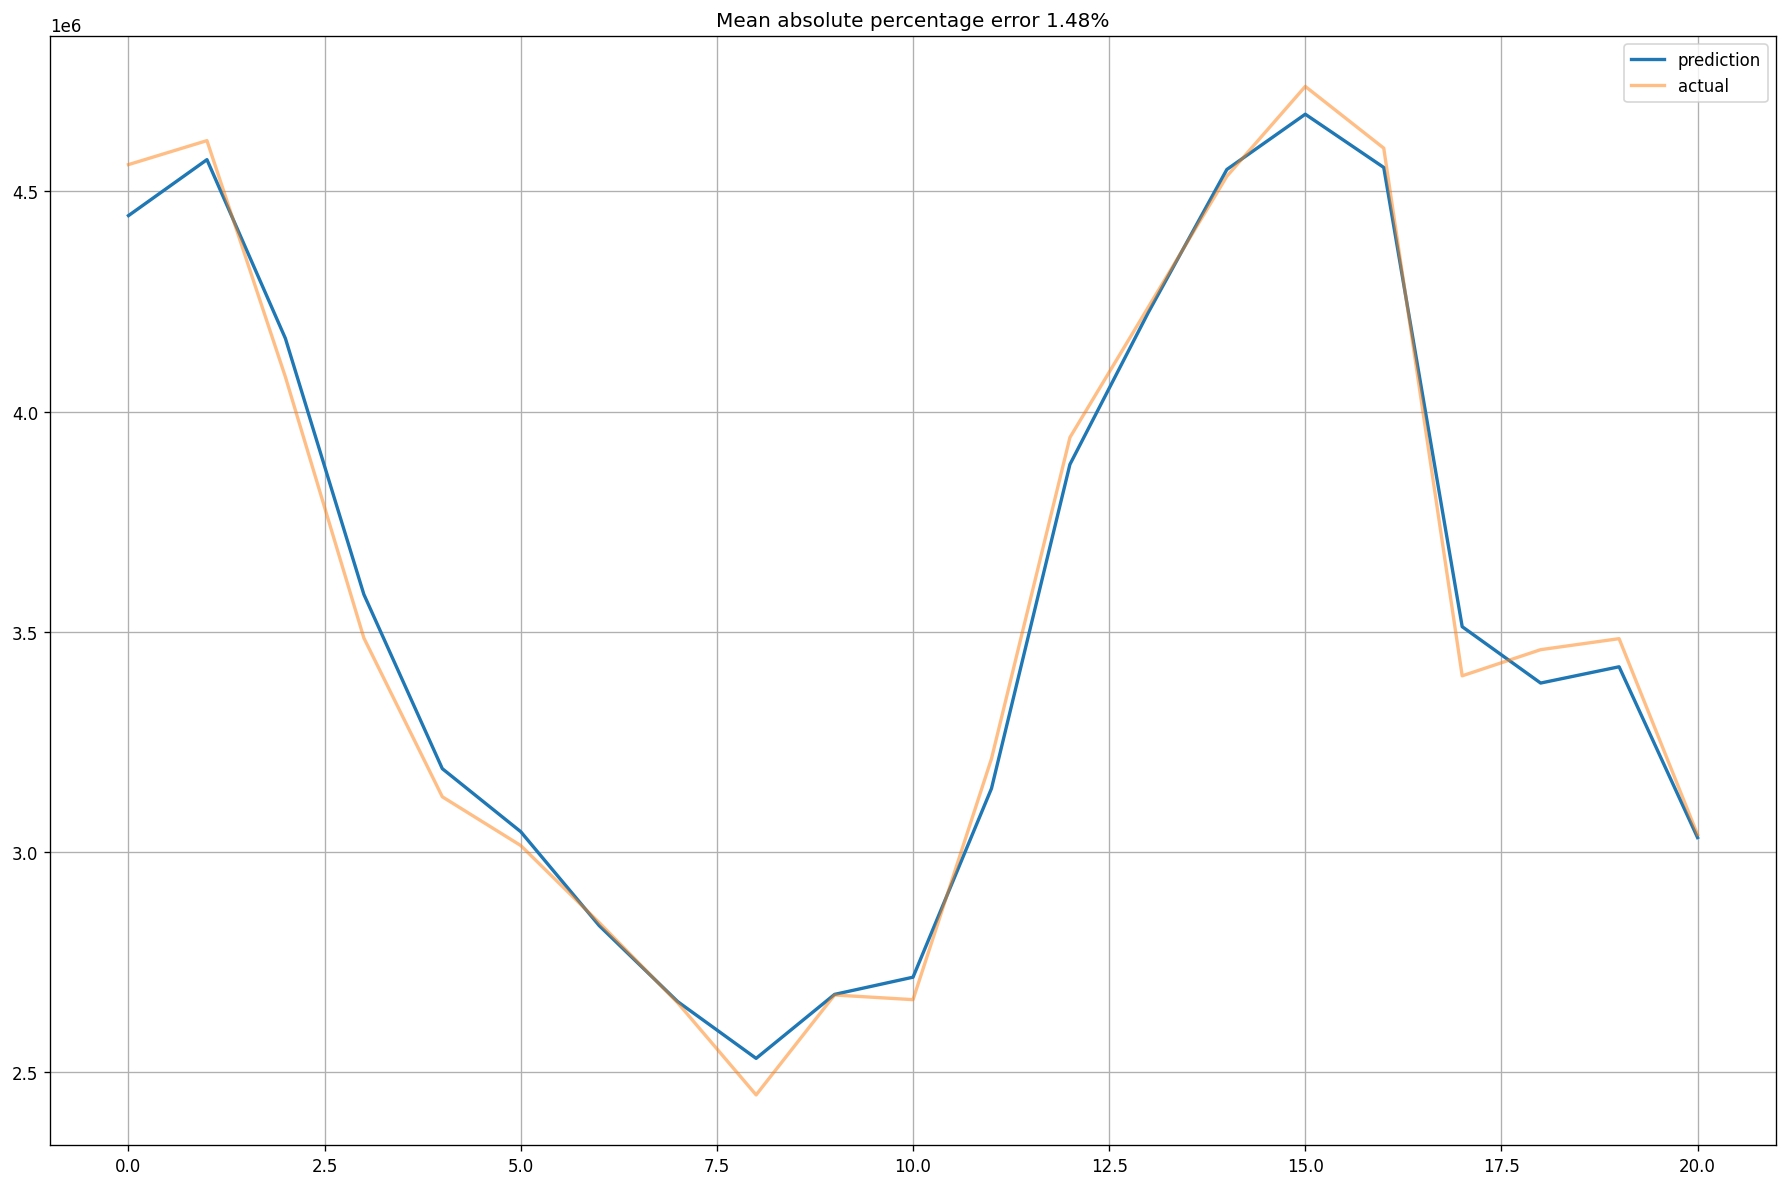

In [568]:
def plotModelTrainingResults(model, X_train=X_train, X_test=X_test):
  
    prediction = model.predict(X_train)
    
    plt.figure(figsize=(15, 10))
    plt.plot(prediction, label="prediction", linewidth=2.0)
    plt.plot(y_train.values, label="actual", linewidth=2.0, alpha=0.5)

    mape_error_var = mean_absolute_percentage_error(prediction, y_train)
    mae_error_var = mean_absolute_error(prediction, y_train)
    mse_error_var = mse_error(prediction, y_train)
    rmse_error_var = rmse_error(prediction, y_train)
    
    plt.title("Mean absolute percentage error {0:.2f}%".format(mape_error_var))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
    results = pd.DataFrame({'Actual':y_train, 
                            'Prediction':prediction  
                           })
    
    return results, mape_error_var, mae_error_var, mse_error_var, rmse_error_var
    
train_results, train_mape_error_var, train_mae_error_var, train_mse_error_var, train_rmse_error_var = plotModelTrainingResults(ensemble_model)

In [569]:
print('MAPE: ' , train_mape_error_var)
print('MAE: ', train_mae_error_var)
print('MSE: ', train_mse_error_var)
print('RMSE: ', train_rmse_error_var)

MAPE:  1.484080683494438
MAE:  52706.39720649651
MSE:  4013393637.062066
RMSE:  63351.35071221502


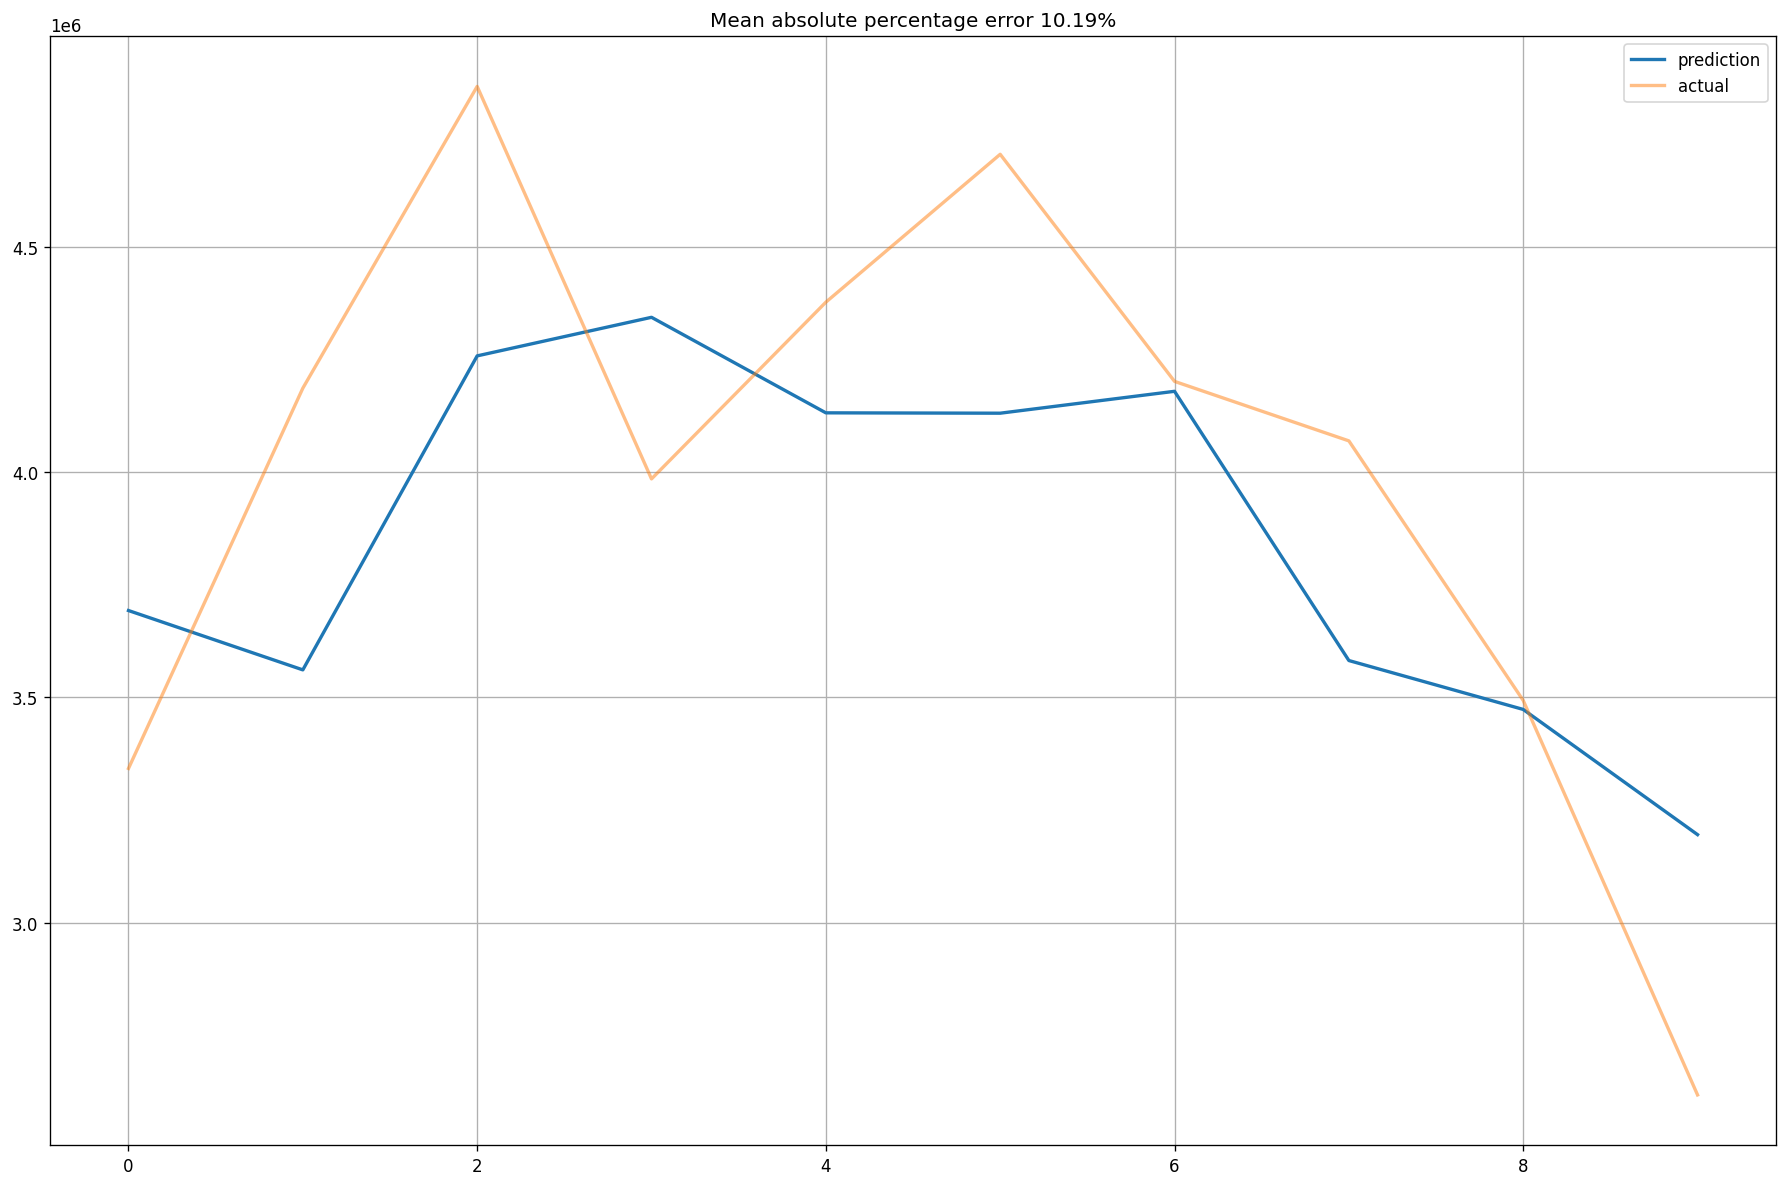

In [570]:
def plotModelPredictions(model, X_train=X_train, X_test=X_test):
  
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 10))
    plt.plot(prediction, label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0, alpha=0.5)

    mape_error_var = mean_absolute_percentage_error(prediction, y_test)
    mae_error_var = mean_absolute_error(prediction, y_test)
    mse_error_var = mse_error(prediction, y_test)
    rmse_error_var = rmse_error(prediction, y_test)
    
    plt.title("Mean absolute percentage error {0:.2f}%".format(mape_error_var))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
    results = pd.DataFrame({'Actual':y_test, 
                            'Prediction':prediction  
                           })
    
    return results, mape_error_var, mae_error_var, mse_error_var, rmse_error_var
    
results, mape_error_var, mae_error_var, mse_error_var, rmse_error_var = plotModelPredictions(ensemble_model)

In [583]:
results['residual'] = results['Actual'] - results['Prediction']
results['model'] = 'Ensemble Model'
results

,Actual,Prediction,residual,model
0,3342217.60,3.692498e+06,-350280.189810,Ensemble Model
1,4185731.20,3.560886e+06,624845.274686,Ensemble Model
2,4855107.24,4.257384e+06,597723.683521,Ensemble Model
3,3984480.00,4.342962e+06,-358481.932640,Ensemble Model
4,4376488.00,4.131041e+06,245446.734401,Ensemble Model
5,4704580.80,4.130247e+06,574333.511528,Ensemble Model
6,4200819.20,4.178810e+06,22009.444008,Ensemble Model
7,4068856.00,3.581594e+06,487261.988258,Ensemble Model
8,3493072.00,3.473125e+06,19947.259577,Ensemble Model
9,2618046.38,3.195380e+06,-577333.850133,Ensemble Model


In [584]:
print('MAPE: ' , mape_error_var)
print('MAE: ', mae_error_var)
print('MSE: ', mse_error_var)
print('RMSE: ', rmse_error_var)

MAPE:  10.19482208556629
MAE:  385766.38685627177
MSE:  196063473693.52762
RMSE:  442790.55285036017


In [585]:
test_results = pd.concat([test_results, results], axis=0) 

In [587]:
test_results['MAPE'] = (abs(test_results['Actual'] - test_results['Prediction'])/test_results['Prediction'] ) *100
test_results['MAE'] = abs(test_results['Actual'] - test_results['Prediction'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='model', ylabel='MAE'>

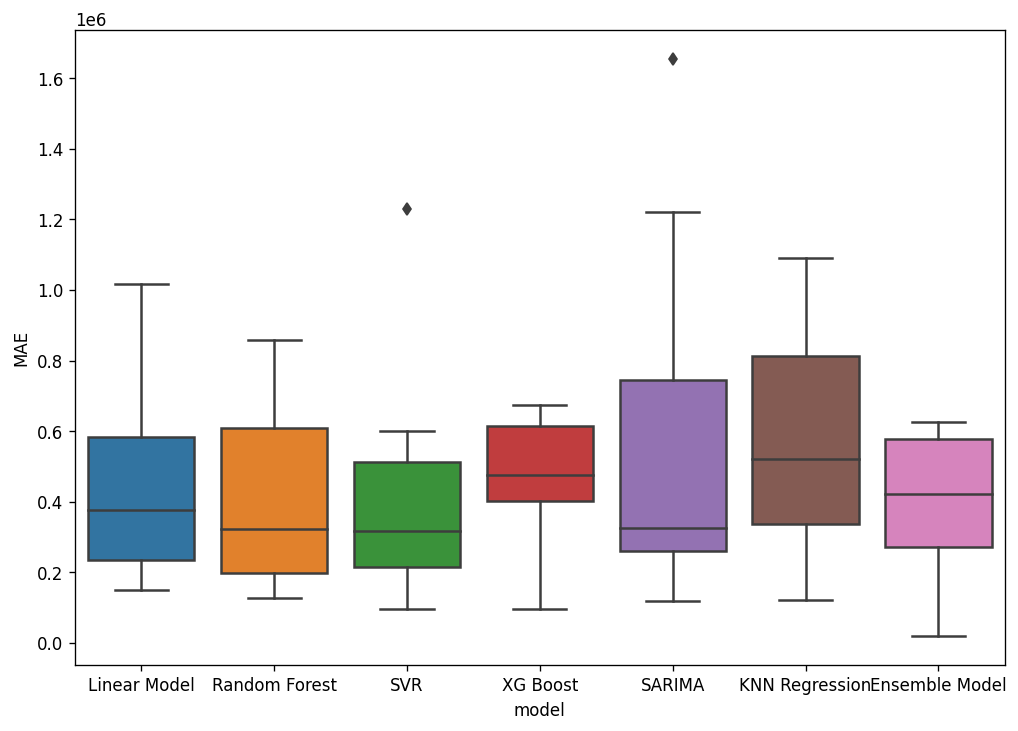

In [588]:
boxplot(test_results['model'], test_results['MAE'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='model', ylabel='MAPE'>

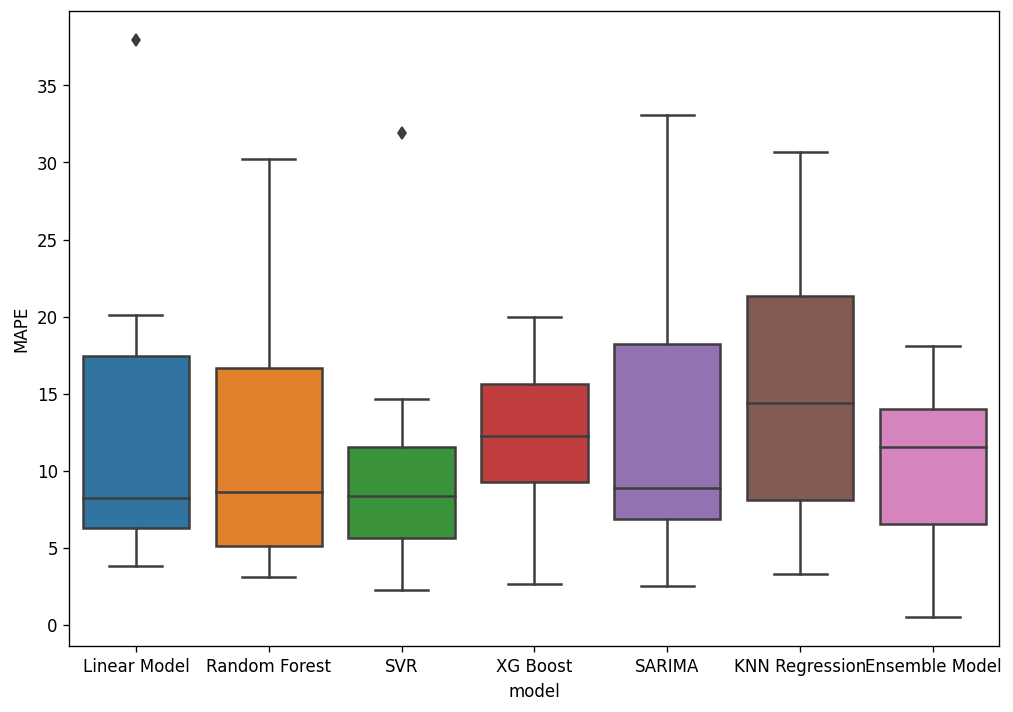

In [589]:
boxplot(test_results['model'], test_results['MAPE'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='model', ylabel='Prediction'>

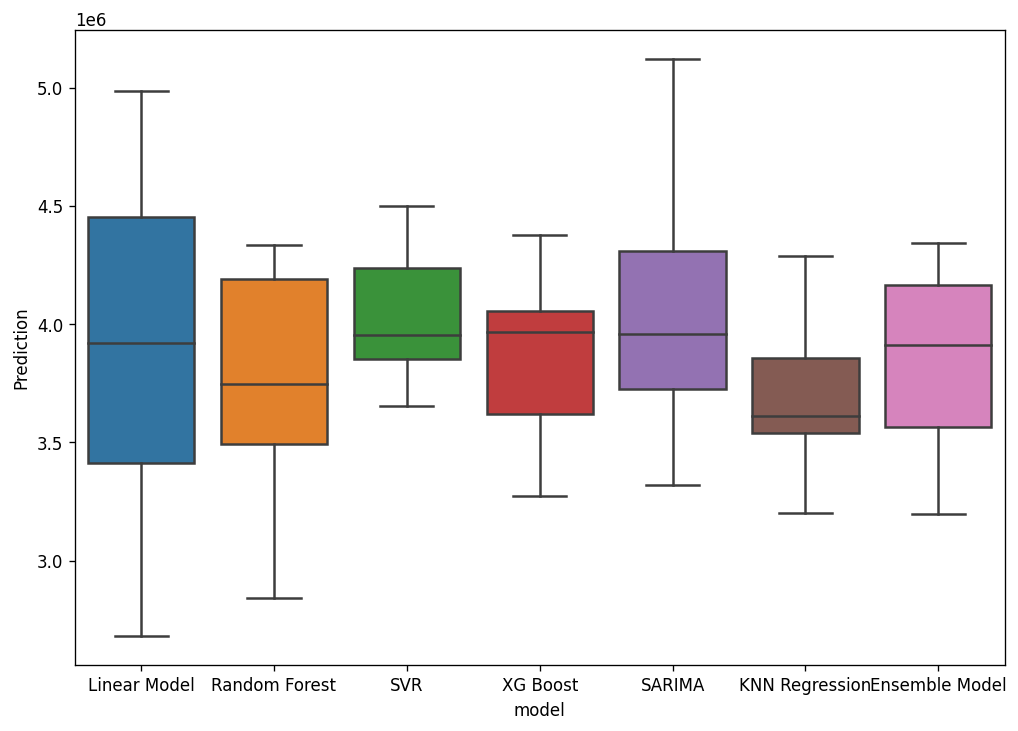

In [590]:
boxplot(test_results['model'], test_results['Prediction'])

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='model', ylabel='Actual'>

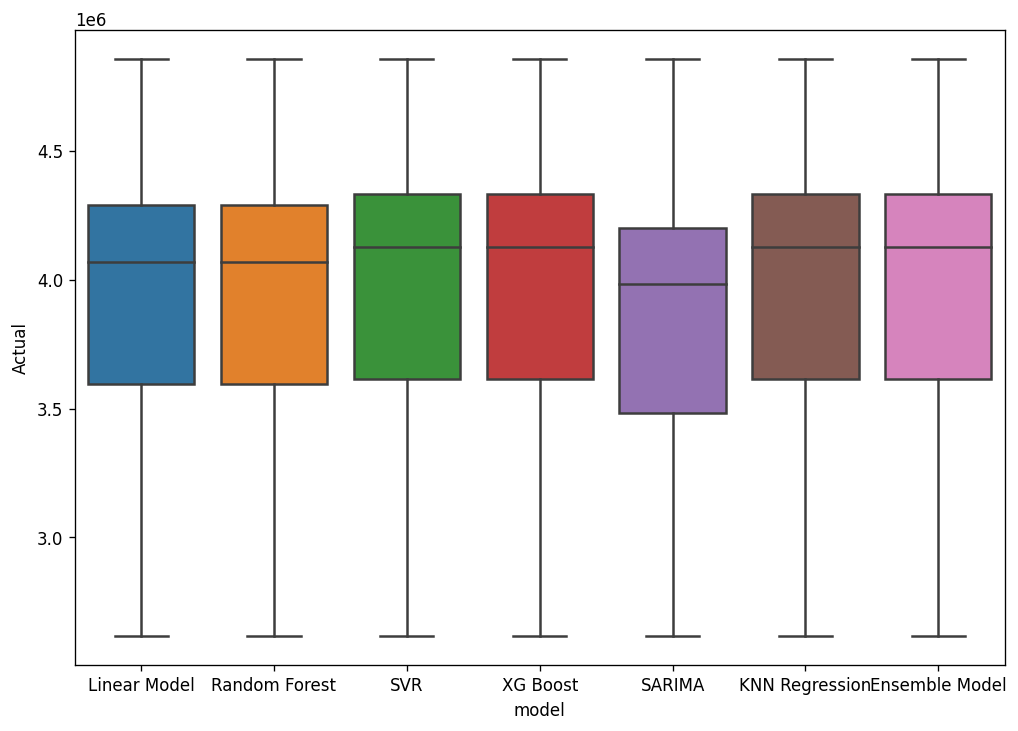

In [591]:
boxplot(test_results['model'], test_results['Actual'])

<AxesSubplot:xlabel='Feature'>

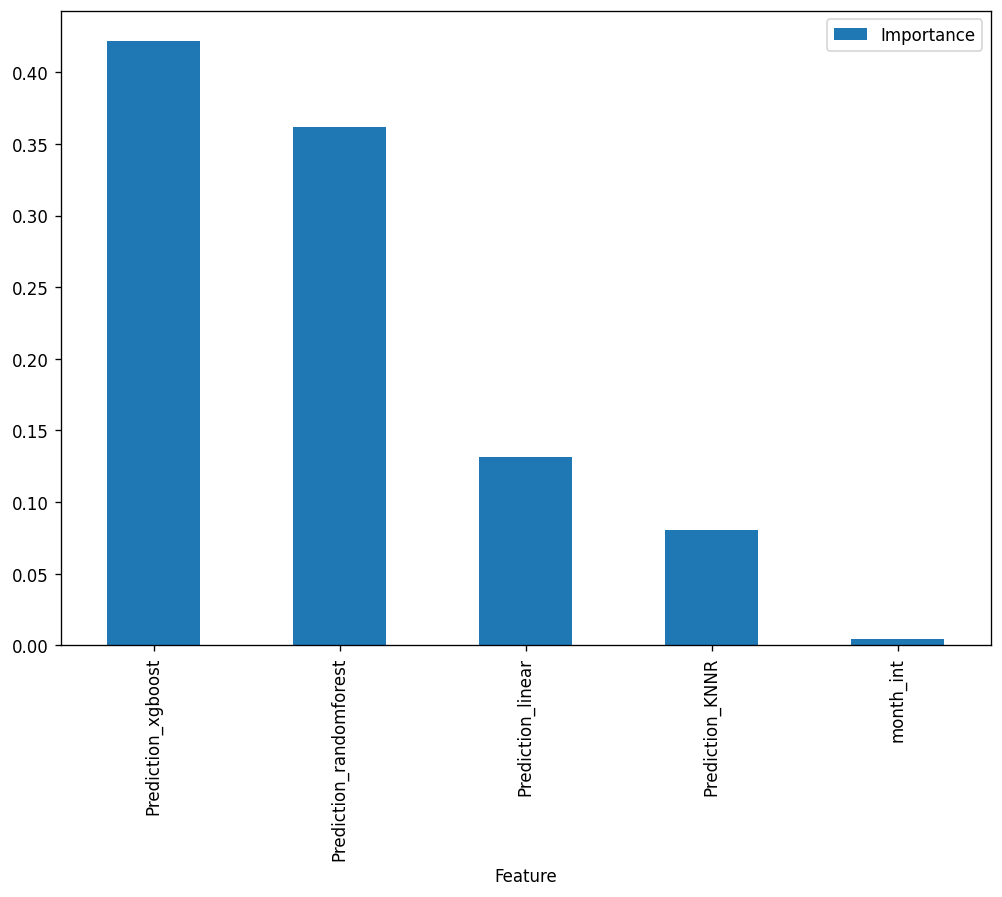

In [592]:
feature_importance = pd.concat([pd.DataFrame(ensemble_model.feature_names_in_, columns = ['Feature']), 
                                pd.DataFrame(ensemble_model.feature_importances_, columns = ['Importance'])], axis=1)
feature_importance["abs"] = feature_importance.Importance.apply(np.abs)
feature_importance = feature_importance.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
feature_importance.head(50)
feature_importance.head(10).plot.bar(x='Feature', y='Importance', rot=90)

In [604]:
model_index = ['Linear Model', 'XG Boost Model', 'Random Forest Model', 'k Nearest Neighbour Regression Model', 'Ensemble Model']
model_results = pd.DataFrame({ 
                               'train_mape':[7.52, 3.468, 4.32, 8.78, 1.48],
                               'test_mape':[12.47, 11.85, 11.654 ,15.72 ,10.19]
                             }, index=model_index)
model_results

,train_mape,test_mape
Linear Model,7.520,12.470
XG Boost Model,3.468,11.850
Random Forest Model,4.320,11.654
k Nearest Neighbour Regression Model,8.780,15.720
Ensemble Model,1.480,10.190


<AxesSubplot:>

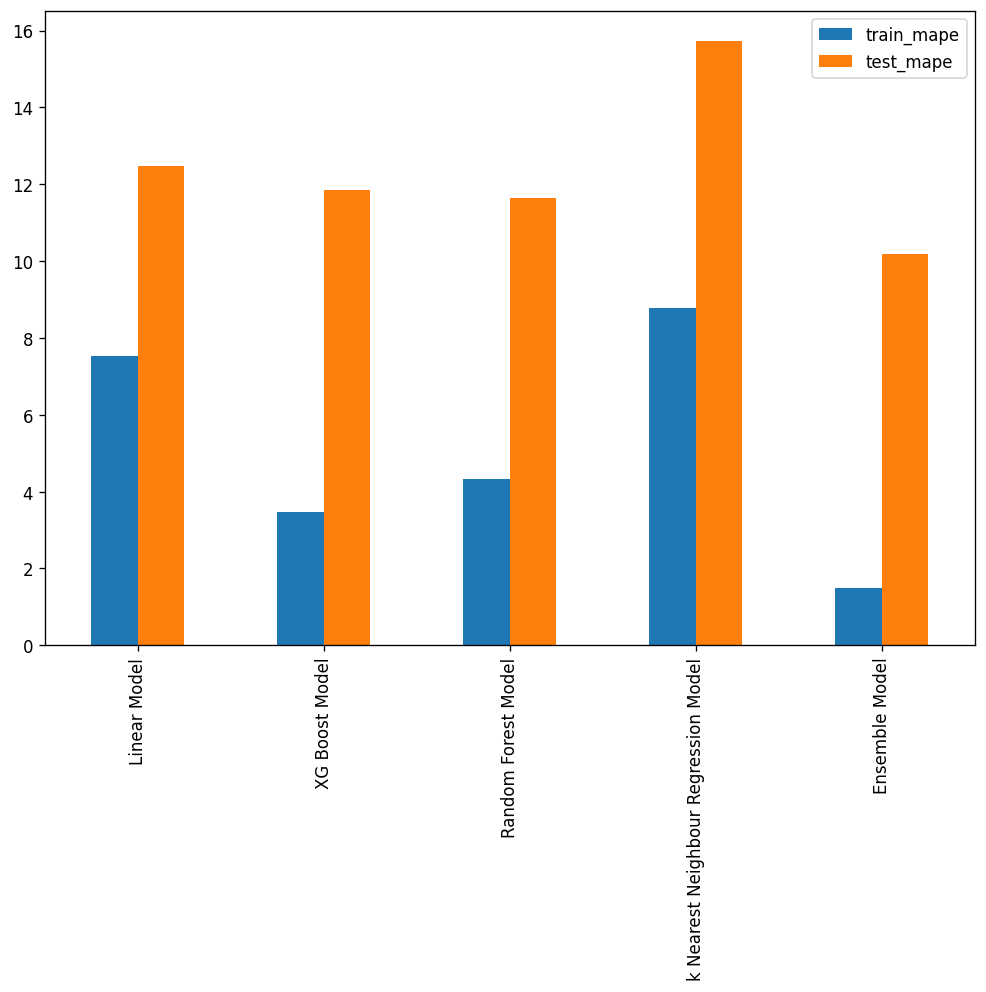

In [605]:
model_results.plot.bar()

In [573]:
import joblib
joblib.dump(ensemble_model, "./ensemble_model_monthly.joblib")

['./ensemble_model_monthly.joblib']